In [56]:
# GRAFICO PARA LOS 4 MODELOS 

In [79]:
from LecturaDatos import read_data

In [80]:
df_clean= read_data()

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [112]:
ts = df_clean['UNIDADES']
# Definir horizonte de pronóstico
forecast_horizon = 12  # 12 meses adelante
train_size = len(ts) - forecast_horizon
train = ts[:train_size]
test = ts[train_size:]
print(f"Datos de entrenamiento: {len(train)} observaciones")
print(f"Datos de prueba: {len(test)} observaciones")
print(f"Pronóstico: {forecast_horizon} períodos adelante")

Datos de entrenamiento: 190 observaciones
Datos de prueba: 12 observaciones
Pronóstico: 12 períodos adelante


In [83]:
# Diccionario para almacenar modelos y resultados
modelos = {}
pronosticos = {}
ajustes = {}
metricas = {}

In [84]:
# Limpiar TODO antes de empezar
ts = df_clean['UNIDADES'].dropna()  # Eliminar NaN
ts = ts[ts > 0]  # Eliminar ceros
ts = ts[np.isfinite(ts)]  # Eliminar infinitos
print(f"Datos limpios: {len(ts)} observaciones")

Datos limpios: 202 observaciones


In [85]:
print("="*50)
print("DIAGNÓSTICO COMPLETO DE DATOS")
print("="*50)

# Verificar datos originales
print(f"\n📊 Datos originales:")
print(f"  df_clean tamaño: {len(df_clean)}")
print(f"  df_clean NaN: {df_clean['UNIDADES'].isna().sum()}")

# Verificar ts
print(f"\n📊 Serie temporal (ts):")
print(f"  ts tamaño: {len(ts)}")
print(f"  ts NaN: {ts.isna().sum()}")
print(f"  ts tipo: {type(ts)}")
print(f"  ts índice: {type(ts.index)}")

# Verificar división
print(f"\n📊 División Train/Test:")
print(f"  forecast_horizon: {forecast_horizon}")
print(f"  train_size calculado: {len(ts) - forecast_horizon}")
print(f"  train tamaño real: {len(train)}")
print(f"  test tamaño real: {len(test)}")

# ¿Por qué test tiene solo 14?
if len(test) != forecast_horizon:
    print(f"\n⚠️ PROBLEMA: test tiene {len(test)} pero debería tener {forecast_horizon}")
    print(f"  Diferencia: {forecast_horizon - len(test)} observaciones")

# Verificar si hay NaN en la división
print(f"\n📊 NaN después de división:")
print(f"  train NaN: {train.isna().sum()}")
print(f"  test NaN: {test.isna().sum()}")

# Ver los últimos registros de train y primeros de test
print(f"\n📋 Últimos 3 de train:")
print(train.tail(3))

print(f"\n📋 Primeros 3 de test:")
print(test.head(3))

print(f"\n📋 Test completo:")
print(test)

DIAGNÓSTICO COMPLETO DE DATOS

📊 Datos originales:
  df_clean tamaño: 202
  df_clean NaN: 0

📊 Serie temporal (ts):
  ts tamaño: 202
  ts NaN: 0
  ts tipo: <class 'pandas.core.series.Series'>
  ts índice: <class 'pandas.core.indexes.base.Index'>

📊 División Train/Test:
  forecast_horizon: 12
  train_size calculado: 190
  train tamaño real: 190
  test tamaño real: 12

📊 NaN después de división:
  train NaN: 0
  test NaN: 0

📋 Últimos 3 de train:
189   63,709.00
190   78,569.00
191   65,623.00
Name: UNIDADES, dtype: float64

📋 Primeros 3 de test:
192   39,935.00
193   72,556.00
194   56,359.00
Name: UNIDADES, dtype: float64

📋 Test completo:
192   39,935.00
193   72,556.00
194   56,359.00
195   44,678.00
196   88,012.00
197   55,004.00
198   64,548.00
199   60,617.00
200   70,504.00
201   47,667.00
202   88,139.00
203   64,870.00
Name: UNIDADES, dtype: float64


In [86]:
print("="*50)
print("DIAGNÓSTICO DE PREDICCIONES")
print("="*50)

# Entrenar modelo
modelo_simple = ExponentialSmoothing(
    train,
    trend=None,
    seasonal=None
).fit(optimized=True)

# Generar predicciones
pronosticos['Simple'] = modelo_simple.forecast(forecast_horizon)

print(f"\n📊 Predicciones:")
print(f"  Cantidad: {len(pronosticos['Simple'])}")
print(f"  NaN: {pronosticos['Simple'].isna().sum()}")
print(f"  Infinitos: {np.isinf(pronosticos['Simple']).sum()}")

# Mostrar todas las predicciones
print(f"\n📋 Predicciones completas:")
print(pronosticos['Simple'])

# Comparar con test
print(f"\n📋 Comparación Test vs Predicciones:")
comparacion = pd.DataFrame({
    'Test_Real': test.values,
    'Prediccion': pronosticos['Simple'].values,
    'Error': test.values - pronosticos['Simple'].values
})
comparacion.index = test.index
print(comparacion)

# Identificar dónde están los NaN
if pronosticos['Simple'].isna().any():
    print(f"\n⚠️ Ubicación de NaN en predicciones:")
    nan_mask = pronosticos['Simple'].isna()
    print(f"  Índices: {pronosticos['Simple'][nan_mask].index.tolist()}")
    print(f"  Posiciones: {np.where(nan_mask)[0].tolist()}")

DIAGNÓSTICO DE PREDICCIONES

📊 Predicciones:
  Cantidad: 12
  NaN: 0
  Infinitos: 0

📋 Predicciones completas:
190   63,599.18
191   63,599.18
192   63,599.18
193   63,599.18
194   63,599.18
195   63,599.18
196   63,599.18
197   63,599.18
198   63,599.18
199   63,599.18
200   63,599.18
201   63,599.18
dtype: float64

📋 Comparación Test vs Predicciones:
     Test_Real  Prediccion      Error
192  39,935.00   63,599.18 -23,664.18
193  72,556.00   63,599.18   8,956.82
194  56,359.00   63,599.18  -7,240.18
195  44,678.00   63,599.18 -18,921.18
196  88,012.00   63,599.18  24,412.82
197  55,004.00   63,599.18  -8,595.18
198  64,548.00   63,599.18     948.82
199  60,617.00   63,599.18  -2,982.18
200  70,504.00   63,599.18   6,904.82
201  47,667.00   63,599.18 -15,932.18
202  88,139.00   63,599.18  24,539.82
203  64,870.00   63,599.18   1,270.82


In [87]:
# MODELO 1: SUAVIZAMIENTO SIMPLE (Solo nivel)
print("\nEntrenando Suavizamiento Simple...")
try:
    modelo_simple = ExponentialSmoothing(
    train,
    trend=None,
    seasonal=None
).fit(optimized=True)

   # Entrenar
    modelo_simple = SimpleExpSmoothing(train).fit(optimized=True)
    
    # Predecir
    pronosticos['Simple'] = modelo_simple.forecast(forecast_horizon)
    
    # Verificar
    print(f"\n✅ Modelo entrenado exitosamente")
    print(f"  Predicciones: {len(pronosticos['Simple'])}")
    print(f"  NaN: {pronosticos['Simple'].isna().sum()}")
    
    if pronosticos['Simple'].isna().sum() == 0:
        print(f"  ✅ No hay NaN en predicciones")
        
        # Calcular errores
        errores_test = test.values - pronosticos['Simple'].values
        
        # Métricas
        mae = mean_absolute_error(test, pronosticos['Simple'])
        rmse = np.sqrt(mean_squared_error(test, pronosticos['Simple']))
        mape = np.mean(np.abs(errores_test / test.values)) * 100
        
        print(f"\n📊 MÉTRICAS:")
        print(f"  MAE:  {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
        
        # Jarque-Bera
        jb_stat, jb_pval = stats.jarque_bera(errores_test)
        
        if not (np.isnan(jb_pval) or np.isinf(jb_pval)):
            resultado = "✅ Normal" if jb_pval > 0.05 else "❌ No Normal"
            print(f"  Jarque-Bera: p={jb_pval:.4f} {resultado}")
    
            # Test alternativo
            sw_stat, sw_pval = stats.shapiro(errores_test)
            resultado = "✅ Normal" if sw_pval > 0.05 else "❌ No Normal"
            print(f"  Shapiro-Wilk: p={sw_pval:.4f} {resultado}")
        
        # Guardar métricas
        metricas['Simple'] = {
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'JB_pvalue': jb_pval if not np.isnan(jb_pval) else sw_pval,
            'n_test': len(test)
        }
    else:
        print(f"  ⚠️ Aún hay {pronosticos['Simple'].isna().sum()} NaN")
        
except Exception as e:
    print(f"❌ Error: {str(e)}")
    import traceback
    traceback.print_exc()


Entrenando Suavizamiento Simple...

✅ Modelo entrenado exitosamente
  Predicciones: 12
  NaN: 0
  ✅ No hay NaN en predicciones

📊 MÉTRICAS:
  MAE:  12030.75
  RMSE: 14847.11
  MAPE: 20.92%
  Jarque-Bera: p=0.7773 ✅ Normal
  Shapiro-Wilk: p=0.6659 ✅ Normal


In [88]:
# MODELO 2: HOLT LINEAL (Nivel + Tendencia)
print("\nEntrenando Holt Lineal...")
try:
    # Entrenar
    modelo_holt = ExponentialSmoothing(
        train,
        trend='add',      # Tendencia aditiva
        seasonal=None,    # Sin estacionalidad
        damped_trend=False  # Tendencia no amortiguada
    ).fit(optimized=True)
    
    # Predecir
    pronosticos['Holt'] = modelo_holt.forecast(forecast_horizon)
    
    # Verificar
    print(f"\n✅ Modelo entrenado exitosamente")
    print(f"  Predicciones: {len(pronosticos['Holt'])}")
    print(f"  NaN: {pronosticos['Holt'].isna().sum()}")
    
    if pronosticos['Holt'].isna().sum() == 0:
        print(f"  ✅ No hay NaN en predicciones")
  
          
        # Calcular errores
        errores_test = test.values - pronosticos['Holt'].values
        
        # Métricas
        mae = mean_absolute_error(test, pronosticos['Holt'])
        rmse = np.sqrt(mean_squared_error(test, pronosticos['Holt']))
        mape = np.mean(np.abs(errores_test / test.values)) * 100
        
        print(f"\n📊 MÉTRICAS:")
        print(f"  MAE:  {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
        
        # Jarque-Bera
        jb_stat, jb_pval = stats.jarque_bera(errores_test)
        
        if not (np.isnan(jb_pval) or np.isinf(jb_pval)):
            resultado = "✅ Normal" if jb_pval > 0.05 else "❌ No Normal"
            print(f"  Jarque-Bera: p={jb_pval:.4f} {resultado}")
            
            # Shapiro-Wilk (siempre mostrar)
            sw_stat, sw_pval = stats.shapiro(errores_test)
            resultado_sw = "✅ Normal" if sw_pval > 0.05 else "❌ No Normal"
            print(f"  Shapiro-Wilk: p={sw_pval:.4f} {resultado_sw}")
            
        # Guardar métricas
        metricas['Holt'] = {
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'JB_pvalue': jb_pval if not np.isnan(jb_pval) else None,
            'SW_pvalue': sw_pval,
            'n_test': len(test)
        }
    else:
        print(f"  ⚠️ Aún hay {pronosticos['Holt'].isna().sum()} NaN")
        
except Exception as e:
    print(f"❌ Error: {str(e)}")
    import traceback
    traceback.print_exc()


Entrenando Holt Lineal...

✅ Modelo entrenado exitosamente
  Predicciones: 12
  NaN: 0
  ✅ No hay NaN en predicciones

📊 MÉTRICAS:
  MAE:  11973.95
  RMSE: 14711.93
  MAPE: 20.97%
  Jarque-Bera: p=0.7547 ✅ Normal
  Shapiro-Wilk: p=0.6458 ✅ Normal


In [89]:
# MODELO 3: HOLT-WINTERS ADITIVO 
print("\n" + "="*60)
print("MODELO 3: HOLT-WINTERS ADITIVO")
print("="*60)

variantes_hw_add = {
    'HW_Add_Standard': {'trend': 'add', 'damped': False},
    'HW_Add_Damped': {'trend': 'add', 'damped': True},
    'HW_Seasonal_Only': {'trend': None, 'damped': False}
}

for nombre, config in variantes_hw_add.items():
    print(f"\n--- {nombre} ---")
    try:
        modelo = ExponentialSmoothing(
            train,
            trend=config['trend'],
            seasonal='add',
            seasonal_periods=12,
            damped_trend=config['damped'] if config['trend'] is not None else False
        ).fit(optimized=True)
        
        pred = modelo.forecast(forecast_horizon)
        
        if pred.isna().sum() == 0:
            errores = test.values - pred.values
            
            mae = mean_absolute_error(test, pred)
            rmse = np.sqrt(mean_squared_error(test, pred))
            mape = np.mean(np.abs(errores / test.values)) * 100
            
            print(f"MAE:  {mae:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"MAPE: {mape:.2f}%")
            
            # Tests de normalidad
            jb_stat, jb_pval = stats.jarque_bera(errores)
            if not np.isnan(jb_pval):
                resultado = "✅" if jb_pval > 0.05 else "❌"
                print(f"Jarque-Bera: p={jb_pval:.4f} {resultado}")
            
            sw_stat, sw_pval = stats.shapiro(errores)
            resultado = "✅" if sw_pval > 0.05 else "❌"
            print(f"Shapiro-Wilk: p={sw_pval:.4f} {resultado}")
            
            # Guardar
            metricas[nombre] = {
                'MAE': mae, 'RMSE': rmse, 'MAPE': mape,
                'JB_pvalue': jb_pval, 'SW_pvalue': sw_pval
            }
        else:
            print(f"⚠️ Predicciones con NaN: {pred.isna().sum()}")
            
    except Exception as e:
        print(f"❌ Error: {str(e)}")


MODELO 3: HOLT-WINTERS ADITIVO

--- HW_Add_Standard ---
MAE:  15950.43
RMSE: 18895.21
MAPE: 30.01%
Jarque-Bera: p=0.8367 ✅
Shapiro-Wilk: p=0.7253 ✅

--- HW_Add_Damped ---
MAE:  15441.38
RMSE: 18233.84
MAPE: 28.76%
Jarque-Bera: p=0.8459 ✅
Shapiro-Wilk: p=0.7778 ✅

--- HW_Seasonal_Only ---
MAE:  13352.19
RMSE: 16821.20
MAPE: 23.55%
Jarque-Bera: p=0.9000 ✅
Shapiro-Wilk: p=0.9018 ✅


In [90]:
# MODELO 3: HOLT-WINTERS ADITIVO
print("Entrenando Holt-Winters Aditivo...")
try:
    modelo_hw_add = ExponentialSmoothing(
        train,
        trend='additive',
        seasonal='additive',
        seasonal_periods=12,
        damped_trend=True
    ).fit(optimized=True)
    
    modelos['HW_Aditivo'] = modelo_hw_add
    ajustes['HW_Aditivo'] = modelo_hw_add.fittedvalues
    pronosticos['HW_Aditivo'] = modelo_hw_add.forecast(forecast_horizon)
    
   # Calcular errores en el conjunto de test
    errores_test = test - pronosticos['HW_Aditivo']
    
    # Métricas en test
    mae = mean_absolute_error(test, pronosticos['HW_Aditivo'])
    mse = mean_squared_error(test, pronosticos['HW_Aditivo'])
    rmse = np.sqrt(mse)  # RMSE
    mape = np.mean(np.abs((test - pronosticos['HW_Aditivo']) / test)) * 100
    
    # Test de Jarque-Bera (normalidad de los residuos)
    jb_statistic, jb_pvalue = stats.jarque_bera(errores_test)
    
    # Guardar métricas
    metricas['HW_Aditivo'] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'JB_statistic': jb_statistic,
        'JB_pvalue': jb_pvalue
    }
    
    print(f"✅ HW_Aditivo- MAE: {mae:.2f}")
    print(f"✅ HW_Aditivo- RMSE: {rmse:.2f}")
    print(f"✅ HW_Aditivo- MAPE: {mape:.2f}%")
    print(f"✅ HW_Aditivo- Jarque-Bera p-value: {jb_pvalue:.4f}")
    
    # Interpretación de Jarque-Bera
    if jb_pvalue > 0.05:
        print(f"   → Los residuos parecen seguir distribución normal (p > 0.05)")
    else:
        print(f"   → Los residuos NO siguen distribución normal (p < 0.05)")
except Exception as e:
    print(f"❌ Simple falló: {str(e)}")
    
    print(f"✅ HW_Aditivo - MAPE: {mape:.2f}%")
except Exception as e:
    print(f"❌  falló: {str(e)}")
       
   


Entrenando Holt-Winters Aditivo...
✅ HW_Aditivo- MAE: 15441.38
✅ HW_Aditivo- RMSE: 18233.84
✅ HW_Aditivo- MAPE: 26.88%
✅ HW_Aditivo- Jarque-Bera p-value: nan
   → Los residuos NO siguen distribución normal (p < 0.05)


In [91]:
# MODELO 4: HOLT-WINTERS MULTIPLICATIVO
print("Entrenando Holt-Winters Multiplicativo...")
try:
    modelo_hw_mult = ExponentialSmoothing(
        train,
        trend='multiplicative',
        seasonal='multiplicative',
        seasonal_periods=12,
        damped_trend=True
    ).fit(optimized=True)
    
    modelos['HW_Multiplicativo'] = modelo_hw_mult
    ajustes['HW_Multiplicativo'] = modelo_hw_mult.fittedvalues
    pronosticos['HW_Multiplicativo'] = modelo_hw_mult.forecast(forecast_horizon)
     
    # Calcular errores en el conjunto de test
    errores_test = test - pronosticos['HW_Multiplicativo']
    
    # Métricas en test
    mae = mean_absolute_error(test, pronosticos['HW_Multiplicativo'])
    mse = mean_squared_error(test, pronosticos['HW_Multiplicativo'])
    rmse = np.sqrt(mse)  # RMSE
    mape = np.mean(np.abs((test - pronosticos['HW_Multiplicativo']) / test)) * 100
    
    # Test de Jarque-Bera (normalidad de los residuos)
    jb_statistic, jb_pvalue = stats.jarque_bera(errores_test)
    
    # Guardar métricas
    metricas['HW_Multiplicativo'] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'JB_statistic': jb_statistic,
        'JB_pvalue': jb_pvalue
    }
    
    print(f"✅ HW_Multiplicativo- MAE: {mae:.2f}")
    print(f"✅ HW_Multiplicativo- RMSE: {rmse:.2f}")
    print(f"✅ HW_Multiplicativo- MAPE: {mape:.2f}%")
    print(f"✅ HW_Multiplicativo- Jarque-Bera p-value: {jb_pvalue:.4f}")
    
    # Interpretación de Jarque-Bera
    if jb_pvalue > 0.05:
        print(f"   → Los residuos parecen seguir distribución normal (p > 0.05)")
    else:
        print(f"   → Los residuos NO siguen distribución normal (p < 0.05)")
except Exception as e:
    print(f"❌ Simple falló: {str(e)}")
    
    print(f"✅ HW_Multiplicativo- MAPE: {mape:.2f}%")
except Exception as e:
    print(f"❌ HW_Multiplicativo falló: {str(e)}")

Entrenando Holt-Winters Multiplicativo...
✅ HW_Multiplicativo- MAE: 15966.81
✅ HW_Multiplicativo- RMSE: 19477.68
✅ HW_Multiplicativo- MAPE: 22.87%
✅ HW_Multiplicativo- Jarque-Bera p-value: nan
   → Los residuos NO siguen distribución normal (p < 0.05)


In [92]:
# MODELO 4: HOLT-WINTERS MULTIPLICATIVO (con variantes)
print("\n" + "="*60)
print("MODELO 4: HOLT-WINTERS MULTIPLICATIVO")
print("="*60)

# Verificar que los datos sean positivos
if (train <= 0).any():
    print("⚠️ ADVERTENCIA: Hay valores <= 0 en train")
    print(f"   Valores <= 0: {(train <= 0).sum()}")
    print("   El modelo multiplicativo puede fallar\n")

variantes_hw_mul = {
    'HW_Mul_Standard': {'trend': 'mul', 'seasonal': 'mul', 'damped': False},
    'HW_Mul_Damped': {'trend': 'mul', 'seasonal': 'mul', 'damped': True},
    'HW_Mul_Seasonal_Only': {'trend': None, 'seasonal': 'mul', 'damped': False},
    'HW_Mixed_TrendAdd_SeasonMul': {'trend': 'add', 'seasonal': 'mul', 'damped': False}
}

for nombre, config in variantes_hw_mul.items():
    print(f"\n--- {nombre} ---")
    try:
        modelo = ExponentialSmoothing(
            train,
            trend=config['trend'],
            seasonal=config['seasonal'],
            seasonal_periods=12,
            damped_trend=config['damped'] if config['trend'] is not None else False
        ).fit(optimized=True)
        
        pred = modelo.forecast(forecast_horizon)
        
        if pred.isna().sum() == 0:
            errores = test.values - pred.values
            
            mae = mean_absolute_error(test, pred)
            rmse = np.sqrt(mean_squared_error(test, pred))
            mape = np.mean(np.abs(errores / test.values)) * 100
            
            print(f"MAE:  {mae:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"MAPE: {mape:.2f}%")
            
            # Tests de normalidad
            jb_stat, jb_pval = stats.jarque_bera(errores)
            if not np.isnan(jb_pval):
                resultado = "✅" if jb_pval > 0.05 else "❌"
                print(f"Jarque-Bera: p={jb_pval:.4f} {resultado}")
            
            sw_stat, sw_pval = stats.shapiro(errores)
            resultado = "✅" if sw_pval > 0.05 else "❌"
            print(f"Shapiro-Wilk: p={sw_pval:.4f} {resultado}")
            
            # Guardar
            metricas[nombre] = {
                'MAE': mae, 'RMSE': rmse, 'MAPE': mape,
                'JB_pvalue': jb_pval, 'SW_pvalue': sw_pval
            }
        else:
            print(f"⚠️ Predicciones con NaN: {pred.isna().sum()}")
            
    except Exception as e:
        print(f"❌ Error: {str(e)}")


MODELO 4: HOLT-WINTERS MULTIPLICATIVO

--- HW_Mul_Standard ---
MAE:  16205.02
RMSE: 19660.14
MAPE: 30.00%
Jarque-Bera: p=0.9425 ✅
Shapiro-Wilk: p=0.7843 ✅

--- HW_Mul_Damped ---
MAE:  15966.81
RMSE: 19477.68
MAPE: 29.45%
Jarque-Bera: p=0.9373 ✅
Shapiro-Wilk: p=0.7889 ✅

--- HW_Mul_Seasonal_Only ---
MAE:  14369.12
RMSE: 18798.54
MAPE: 25.54%
Jarque-Bera: p=0.9051 ✅
Shapiro-Wilk: p=0.7700 ✅

--- HW_Mixed_TrendAdd_SeasonMul ---
MAE:  15256.68
RMSE: 18899.71
MAPE: 27.74%
Jarque-Bera: p=0.9326 ✅
Shapiro-Wilk: p=0.7752 ✅


In [93]:
#sns.boxplot(df1['UNIDADES'])

print(len(df_clean))

202


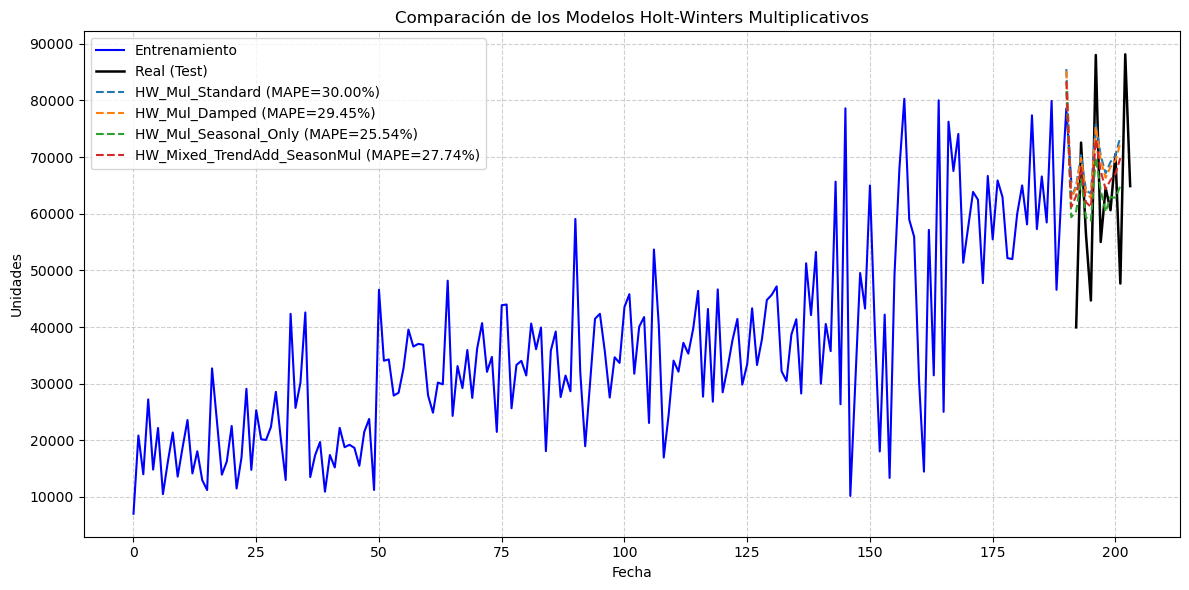

In [95]:
# ===========================================================
# GRAFICAR COMPARACIÓN TEMPORAL DE LOS 4 MODELOS CON MAPE
# ===========================================================
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento', color='blue', linewidth=1.5)
plt.plot(test.index, test, label='Real (Test)', color='black', linewidth=1.8)

# Recalcular o reutilizar predicciones de cada modelo
for nombre, config in variantes_hw_mul.items():
    try:
        modelo = ExponentialSmoothing(
            train,
            trend=config['trend'],
            seasonal=config['seasonal'],
            seasonal_periods=12,
            damped_trend=config['damped'] if config['trend'] is not None else False
        ).fit(optimized=True)
        pred = modelo.forecast(forecast_horizon)
        
        # Recuperar el MAPE desde el diccionario de métricas
        mape_val = metricas[nombre]['MAPE'] if nombre in metricas else np.nan
        
        # Graficar con MAPE en la leyenda
        plt.plot(pred.index, pred, linestyle='--', linewidth=1.5,
                 label=f"{nombre} (MAPE={mape_val:.2f}%)")
    except Exception as e:
        print(f"⚠️ Error al graficar {nombre}: {str(e)}")
        continue

plt.title('Comparación de los Modelos Holt-Winters Multiplicativos')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


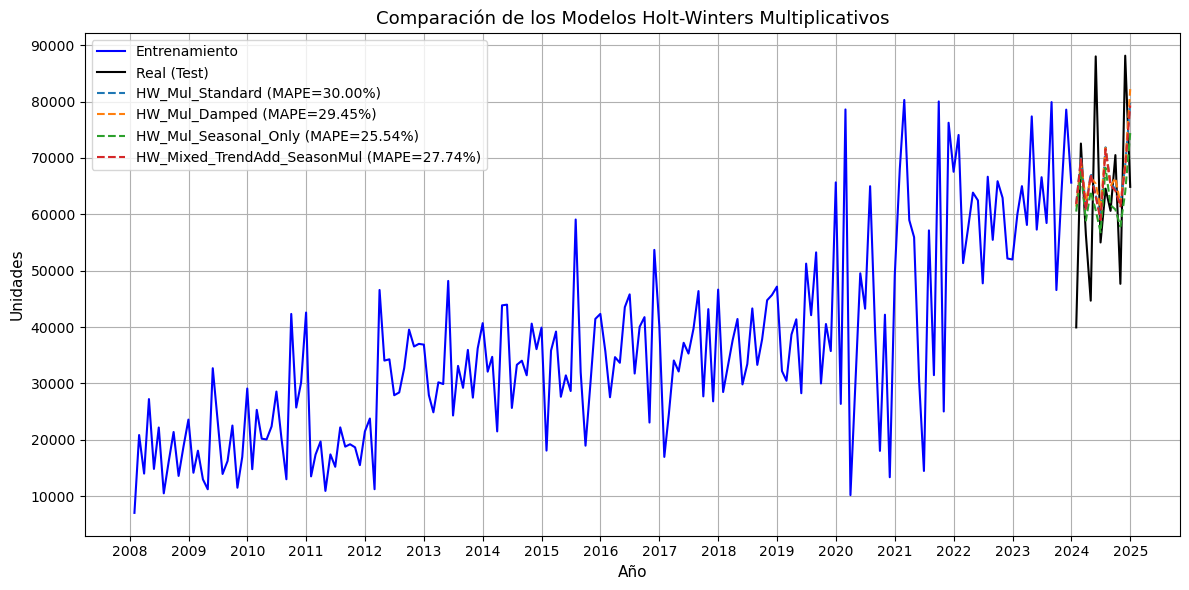

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# df_clean ya está cargado con FECHA y UNIDADES
df_clean['FECHA'] = pd.to_datetime(df_clean['FECHA'])
df_clean = df_clean.sort_values('FECHA')

# Dividir train y test (últimos 12 meses, por ejemplo)
n_test = 12
train = df_clean.iloc[:-n_test]
test = df_clean.iloc[-n_test:]

# Diccionario con tus MAPE ya calculados (no se modifican)
mape_dict = {
    'HW_Mul_Standard': 30.00,
    'HW_Mul_Damped': 29.45,
    'HW_Mul_Seasonal_Only': 25.54,
    'HW_Mixed_TrendAdd_SeasonMul': 27.74
}

# Supongamos que tienes las predicciones en este diccionario (ya calculadas)
# predicciones = {nombre_modelo: serie_predicha}
# Ejemplo: predicciones['HW_Mul_Standard'] = serie_predicha

# === GRÁFICO FINAL ===
plt.figure(figsize=(12,6))

# Serie de entrenamiento
plt.plot(train['FECHA'], train['UNIDADES'], label='Entrenamiento', color='blue')

# Serie real de prueba
plt.plot(test['FECHA'], test['UNIDADES'], label='Real (Test)', color='black')

# Series predichas de cada modelo
for modelo, pred in predicciones.items():
    plt.plot(pred.index, pred, label=f"{modelo} (MAPE={mape_dict[modelo]:.2f}%)", linestyle='--')

# Configuración del eje X con años
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Etiquetas y título
plt.title("Comparación de los Modelos Holt-Winters Multiplicativos", fontsize=13)
plt.xlabel("Año", fontsize=11)
plt.ylabel("Unidades", fontsize=11)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
